# Final Project on Iris data Set ( submitted by Anamika Medhi )

This project is for the class of OPS802. The target of the project is to have a hands on full data analytics experience from A to Z. That means starting with raw data and reading it into python then doing some analytical and statstical observations on the data and finally doing some supervised and unsupervised learning on the data. The data we will use for this project is one of the most famous datasets in the machine learning world which is called IRIS classification dataset. That means there is plenty of resources for you online to learn from and that you are not the first person who saw and analyzed this data. Use this to your advantage. The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper "The use of multiple measurements in taxonomic problems" as an example of linear discriminant analysis. We will describe it more in details later. The project measures the capabilities of lodaing data, cleaning it up, running some tests and statistical analysis and finally machine learning. The following highlights the project
-  The project consists of four parts, they are mostly independent and in order based on what we studies in class
-  The deadline of the project is the last day of the quarter
-  The project is individual, however I encourage you to talk to each other to check your different approaches without copying codes or talking about detailed code specific. For example, it is ok to ask about which function you have used to tackle part a and is it better than this other function or not. It is not ok to copy the exact code including that function you asked about.
- You are expected to heavily utilize resources outside the class notebooks such as Google, StackOverflow, .. etc
- Code cleanings and Display has 10% of the grade

# Part1: Data Loading and Cleaning up
The iris flower dataset consists of 150 collected observations for different flower's charachteristics. The dataset contains four attributes. These four attributes help decide which Iris class does the flower belong to. The four attributes are sepal length, sepal width, petal length, and petal width; all in cm. The data set contains 3 classes Iris Setosa, Iris Versicolour, and Iris Virginica. For more info about the dataset, you can chek [this link](https://en.wikipedia.org/wiki/Iris_flower_data_set). The end target of the project will be to build a model that can predict, based on the four attributes, which class does the flower belong to.

In the first part of the project we will start by loading the data and cleaning up any problems within the data. 

- load the Iris dataset using the file iris.data. You can open it with any text editor to find out how it looks like. Decide which separator you would like to use and if any rows needs to be skipped
<br>
Now let's do some exploring
- How many rows and colums are in the file
- How many nulls in the file
- Which rows contains nans and how many nans in each of these rows
- How many nans per columns?
- The 36th sample should be: 4.9,3.1,1.5,0.2,"Iris-setosa" based on the original paper. Is that what you have? If not, fix it
- The 39th sample: 4.9,3.6,1.4,0.1,"Iris-setosa",  where the errors are in the second and third features. Fix it

In [38]:
import pandas as pd

In [39]:
df=pd.read_csv("/Users/sauravtalukdar/Documents/lec3/final project/iris_not_clean.data",sep='|',header=None,)
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,# this data is for IRIS,NaN,NaN,NaN,NaN
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa


In [40]:
df.columns=["Sepal_Length", "Sepal_Width", "Petal_Length", "Petal_Width","Class"]#Assigning Columnnames
df.shape # Shape of the matrix before cleaning

(155, 5)

In [41]:
#Checking for total number of null/nan values in each column
#df.isnull().sum() # We can use this or else the below for presentation.

# Displaying the number of null values for each column.
for i in df.columns:
    a=df[i].isnull().sum()
    print("There are ",a," nan Values in column ", i)

There are  2  nan Values in column  Sepal_Length
There are  3  nan Values in column  Sepal_Width
There are  4  nan Values in column  Petal_Length
There are  4  nan Values in column  Petal_Width
There are  4  nan Values in column  Class


In [42]:
df[df.isnull().any(axis=1)] # Displating the rows containing Null/Nan values

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
1,# this data is for IRIS,NaN,NaN,NaN,NaN
29,5.2,3.4,NaN,0.2,Iris-setosa
30,NaN,NaN,NaN,NaN,NaN
34,#is this correct?,NaN,NaN,NaN,NaN
46,NaN,3.2,2.1,NaN,NaN


In [43]:
#The 36th sample should be: 4.9,3.1,1.5,0.2,"Iris-setosa" based on the original paper. 
#The 39th sample: 4.9,3.6,1.4,0.1,"Iris-setosa" based on the original paper.
df.loc[36]

Sepal_Length            5.5
Sepal_Width             4.2
Petal_Length            1.4
Petal_Width             0.2
Class           Iris-setosa
Name: 36, dtype: object

In [44]:
df.loc[39]

Sepal_Length            5.5
Sepal_Width             3.5
Petal_Length            1.3
Petal_Width             0.2
Class           Iris-setosa
Name: 39, dtype: object

In [45]:
#Replacing the values with the desired values as given.
df.loc[36]=[4.9,3.1,1.5,0.2,"Iris-setosa"]
df.loc[39]=[4.9,3.6,1.4,0.1,"Iris-setosa"]

In [46]:
#Dropping null values from the data frame. Cleaning the data and checking.
clean_df=df.dropna()
clean_df.isnull().sum()

Sepal_Length    0
Sepal_Width     0
Petal_Length    0
Petal_Width     0
Class           0
dtype: int64

In [47]:
#Checking for datatypes of all the columns
clean_df.dtypes

Sepal_Length     object
Sepal_Width     float64
Petal_Length    float64
Petal_Width     float64
Class            object
dtype: object

In [48]:
#CHanging data type of 1st column to float as is a numeric values.
clean_df=clean_df.assign(Sepal_Length=clean_df['Sepal_Length'].astype('float64'))
clean_df.dtypes

Sepal_Length    float64
Sepal_Width     float64
Petal_Length    float64
Petal_Width     float64
Class            object
dtype: object

- There are 4 quantitative variables and 1 categorical variable.

In [49]:
clean_df["Class"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

- There are three distinct class in the categorical variable.

In [50]:
#Checking for the 36th and 39th column data as entered.
clean_df.loc[36]

Sepal_Length            4.9
Sepal_Width             3.1
Petal_Length            1.5
Petal_Width             0.2
Class           Iris-setosa
Name: 36, dtype: object

In [51]:
clean_df.loc[39]

Sepal_Length            4.9
Sepal_Width             3.6
Petal_Length            1.4
Petal_Width             0.1
Class           Iris-setosa
Name: 39, dtype: object

- Now we have cleaned the data and saved it in clean_df dataframe, whcih we will be using ahead for further analysis.

# Part 2: Stastical Exploring
In this part we will understand a little more about the data and do some cool plottings
- What is the mean and variance for each column and use the function describe to get insights about the data
- Drop the nan rows
- Recaluclate the mean and variance for each column
- What is the correlation between the fourth column and each of the other three columns individually? Any observations
- How many records exist for each class. # Hint, you can do this in one line by using groupby
- Change the random seed to 1234 and randomly pick 20 samples of the data and display it
- Plot histogram for all the data attributes
- Plot histogram for all the data attributes per class, i.e. grouped by classes

In [52]:
# Displaying statistical data like mean, std, min, max and quantiles using describe.
clean_df.describe()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.830000,3.047333,3.759333,1.198000
std,0.840881,0.424058,1.763542,0.764082
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [53]:
#Displaying the correlation data of each quantitative variables with each other.
clean_df.corr()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
Sepal_Length,1.000000,-0.115809,0.880323,0.826352
Sepal_Width,-0.115809,1.000000,-0.408883,-0.344582
Petal_Length,0.880323,-0.408883,1.000000,0.962753
Petal_Width,0.826352,-0.344582,0.962753,1.000000


- We see from the correlation data that there is high positive linear correlation between Sepal_Length and Petal_Length as well as Sepal_Length and Petal Width.
- Petal_Width is also highly positively correlated with Petal_Length.

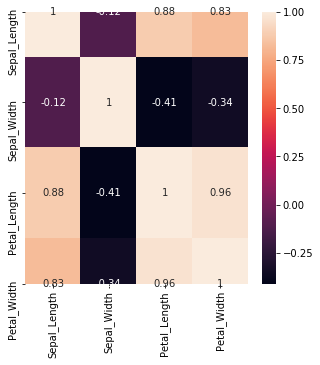

In [54]:
# Plotting the correlation data for visualization.
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(clean_df.corr(),annot=True)

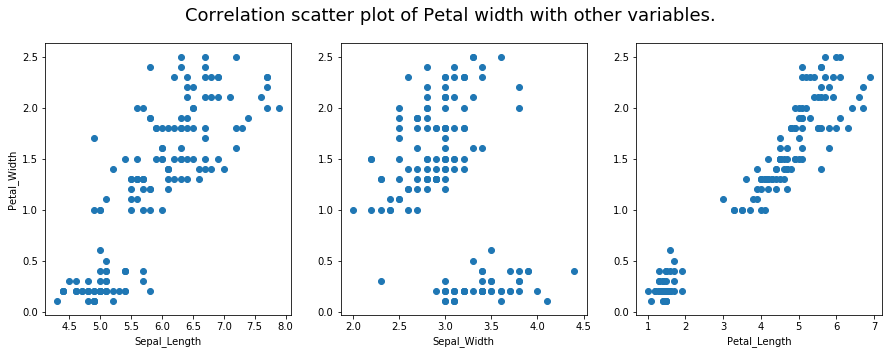

In [55]:
# Plotting correlation scatter plot for visualization of Petal Width with Sepal_Length, Width and Petal Length.


fig,axs=plt.subplots(1,3,figsize=(15,5))
axs[0].scatter(clean_df['Sepal_Length'],clean_df['Petal_Width'])
axs[0].set_xlabel('Sepal_Length')
axs[0].set_ylabel('Petal_Width')

axs[1].scatter(clean_df['Sepal_Width'],clean_df['Petal_Width'])
axs[1].set_xlabel('Sepal_Width')

axs[2].scatter(clean_df['Petal_Length'],clean_df['Petal_Width'])
axs[2].set_xlabel('Petal_Length')

fig.suptitle("Correlation scatter plot of Petal width with other variables.", fontsize=18)
plt.show()

- We see Petal width have a positive Linear correlationship with Sepal_Length and Petal_Length as confirmed by the correlation matrix.
- Petal width shows a negative linear correlation with Sepal Width as confirmed by correlation matrix.

In [56]:
#Number of Record of each Class
clean_df.groupby(["Class"]).count()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
Class,,,,
Iris-setosa,50,50,50,50
Iris-versicolor,50,50,50,50
Iris-virginica,50,50,50,50


In [57]:
#Setting a random seed to 1234 and selecting a random sample of 20 from the data.
sample_df=clean_df.sample(n=20,random_state=1234)
sample_df.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
96,6.1,3.0,4.6,1.4,Iris-versicolor
68,6.1,2.9,4.7,1.4,Iris-versicolor
108,6.3,2.9,5.6,1.8,Iris-virginica
7,4.6,3.4,1.4,0.3,Iris-setosa
64,5.2,2.7,3.9,1.4,Iris-versicolor


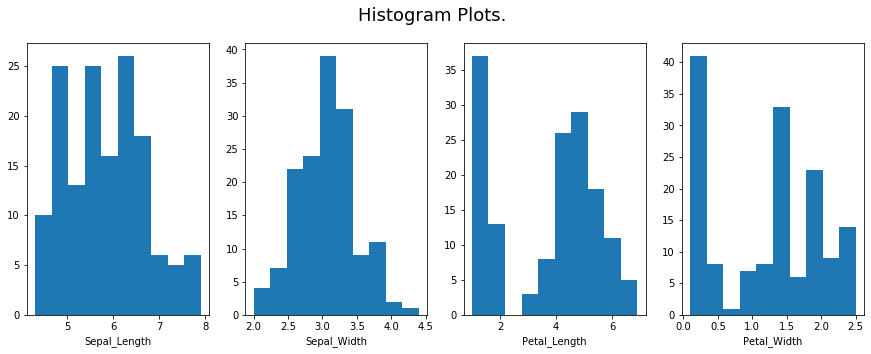

In [58]:
#Plotting Histogram of all the data attributes.

fig,axs=plt.subplots(1,4,figsize=(15,5))

axs[0].hist(clean_df['Sepal_Length'],bins=10)
axs[0].set_xlabel('Sepal_Length')

axs[1].hist(clean_df['Sepal_Width'],bins=10)
axs[1].set_xlabel('Sepal_Width')

axs[2].hist(clean_df['Petal_Length'],bins=10)
axs[2].set_xlabel('Petal_Length')

axs[3].hist(clean_df['Petal_Width'],bins=10)
axs[3].set_xlabel('Petal_Width')


fig.suptitle("Histogram Plots.", fontsize=18)
plt.show()

In [59]:
# Grouping the data with respect to its Class.
grouped = clean_df.groupby(by='Class')
grouped.head(4)

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
55,7.0,3.2,4.7,1.4,Iris-versicolor
56,6.4,3.2,4.5,1.5,Iris-versicolor
57,6.9,3.1,4.9,1.5,Iris-versicolor
58,5.5,2.3,4.0,1.3,Iris-versicolor
105,6.3,3.3,6.0,2.5,Iris-virginica
106,5.8,2.7,5.1,1.9,Iris-virginica


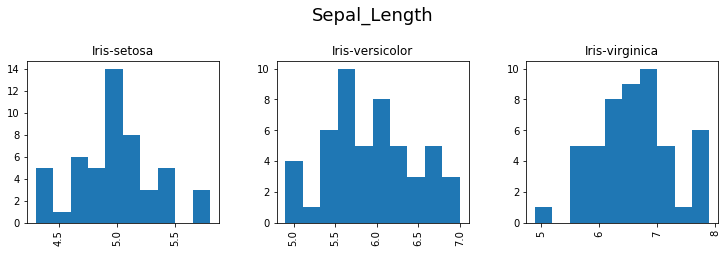

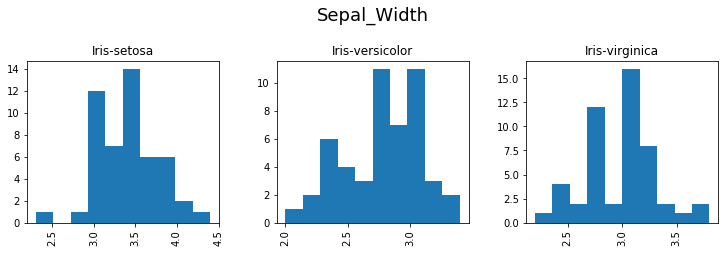

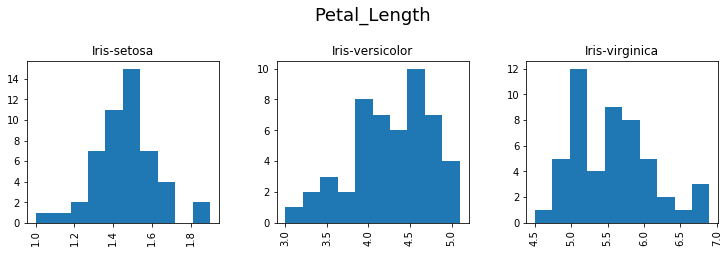

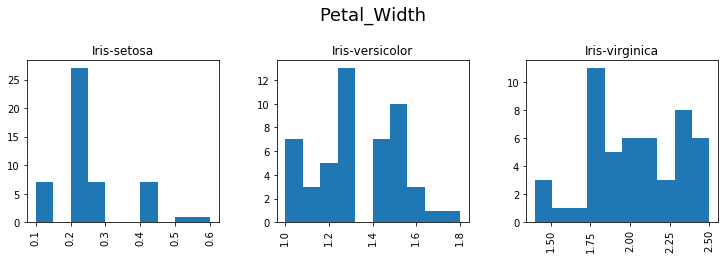

In [60]:
#Plotting histogram plots of the data attributes with respect to its Class.
for i in ["Sepal_Length","Sepal_Width","Petal_Length","Petal_Width"]:
    clean_df[i].hist(by=clean_df["Class"],bins=10,layout=(1,3),figsize=(12,3))
    plt.suptitle(i,x=0.5, y=1.15,fontsize=(18))


# Part 3: Statistical Analysis 
In this part, you will explore some curve fitting and dimensionality reductions attributes


- Use Scipy pdf fitting to do a curve fitting for the petal-length
- Plot the normalized histogrm of the petal-length and the estimated pdf on the same figure
- Generate new 500 samples using the estimated pdf for the petal-length 
- Calculate the mean of the new samples and compare how close it is to the mean of the given data

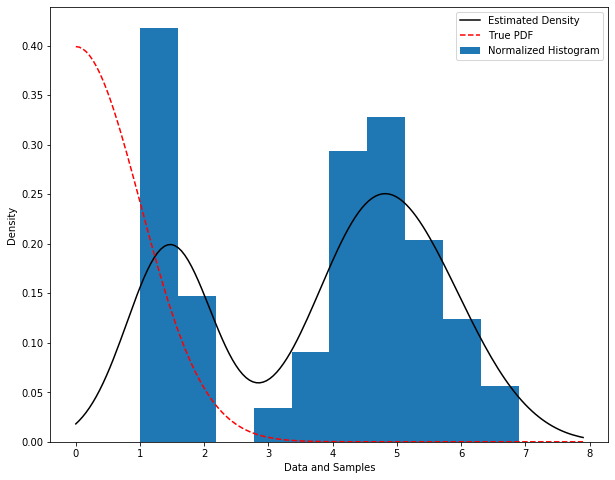

In [61]:
#Normalised distribution and Probability distribution
import scipy.stats
import numpy as np
x1=clean_df["Petal_Length"]
xs=np.linspace(x1.min()-1, x1.max()+1, len(x1))

kde1 = scipy.stats.gaussian_kde(x1)  # find out the best fit

fig = plt.figure(figsize=(10,8))

plt.hist(x1, density=True, label='Normalized Histogram')  # rug plot
plt.plot(xs, kde1(xs), 'k-', label="Estimated Density")  # test your fit
plt.plot(xs, scipy.stats.norm.pdf(xs), 'r--', label="True PDF")  # show the real distribution
plt.xlabel('Data and Samples')
plt.ylabel('Density')
plt.legend()


In [62]:
# Diference between means of actual data and the generated 500 samples from the estimated pdf and gausian .
pdf2 = np.random.choice(scipy.stats.norm.pdf(xs),size=500)
kde2 = np.random.choice(kde1(xs),size=500)
print("Estimated Density Mean for 500 random samples",kde2.mean())
print("True PDF Mean for 500 random samples",pdf2.mean())
print("Actual Data Mean ",x1.mean())

Estimated Density Mean for 500 random samples 0.12455994719148307
True PDF Mean for 500 random samples 0.06205201609179321
Actual Data Mean  3.7593333333333354


### PCA
- Use Scikit to do PCA on the IRIS dataset
- do a bar plot that shows the importance of info in each of the new dimensions
- use PCA to reduce the number of attributes by 1. Note that for all the next parts, you will use the reduced data

In [63]:
#Principal Component Analysis.
# Separating the qualitalive and Quantitative data
Y=clean_df["Class"]
X=clean_df.drop(["Class"],axis=1)
X.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
0,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2


In [64]:
#Preparing the data fro further processing.
from sklearn.preprocessing import StandardScaler as Std_scalar
from sklearn.decomposition import PCA 
sc = Std_scalar()
pca = PCA() # number of components not mentioned, to see the information of explained variance ratio of each component.

In [65]:
# Standardize data(Normalizing the data)
X_std = sc.fit_transform(X) # Normalized data
X_fit=pca.fit_transform(X_std)
print(pca.explained_variance_ratio_)

[0.72893291 0.22985765 0.03609343 0.00511601]


<BarContainer object of 4 artists>

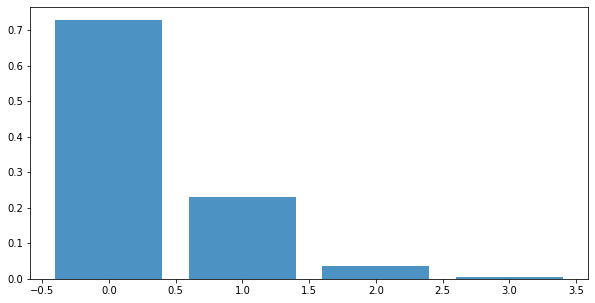

In [66]:
#PLoting a bar plot for the Explained variance ratio showing the inportance of principal components of the data.
fig, ax=plt.subplots(figsize=(10,5))
pca_ratio=pca.explained_variance_ratio_
plt.bar(range(4),pca.explained_variance_ratio_, label="Explained Variance Ratio", alpha=0.8)

In [67]:
# Dropping the number of components by 1 using PCA
pca=PCA(n_components=3)
X_fit1=pca.fit_transform(X_std)
Y.reset_index(drop=True,inplace=True)
principal_components=pd.DataFrame(data=X_fit1,columns=["Pc1","Pc2","Pc3"])
f_df=pd.concat([principal_components,Y],axis=1)
f_df.head() # final dataframe for analysis ahead.

,Pc1,Pc2,Pc3,Class
0,-2.254445,0.565689,-0.146664,Iris-setosa
1,-2.075473,-0.621749,-0.238084,Iris-setosa
2,-2.355928,-0.266348,0.033028,Iris-setosa
3,-2.291721,-0.526418,0.082249,Iris-setosa
4,-2.378150,0.744076,-0.007214,Iris-setosa


# Part 4: Machine Learning
In this part, you will explore the use of supervised and non supervised learning

### Non-Supervised Learning 
- using Kmeans, divide the data into different clusters. The number of clusters should be the same as the number of categories you have in the data
- Do scatter plot for each two combination of the three dimensions together (0 vs 1), (0 vs 2), (1 vs 2). Use the kmeans labels to color the points in the scatter plots

[[ 1.72099389  0.60388646 -0.01369359]
 [-2.22347738  0.28889953 -0.04440583]
 [ 0.57145578 -0.80806868  0.05403567]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 2 2 2 0 2 2 2 2 2 2 2 2 0 2 2 2 2 0 2 2 2
 2 0 0 0 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 0 0 0 0 0 0 2 2 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


Text(0.5, 0, 'Pc2 and Pc3')

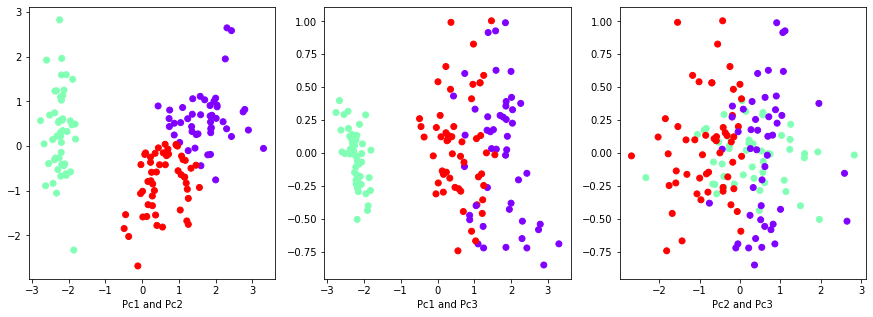

In [68]:
#KMeans Clustering
from sklearn.cluster import KMeans  
kmeans = KMeans(n_clusters=3)  # number od Clusters as number of Classes.
kmeans.fit(X_fit1) 
print(kmeans.cluster_centers_)  
print(kmeans.labels_)  
fig, axs=plt.subplots(1,3,figsize=(15,5))
axs[0].scatter(X_fit1[:,0],X_fit1[:,1], c=kmeans.labels_, cmap='rainbow')
axs[0].set_xlabel("Pc1 and Pc2")
axs[1].scatter(X_fit1[:,0],X_fit1[:,2], c=kmeans.labels_, cmap='rainbow')
axs[1].set_xlabel("Pc1 and Pc3")
axs[2].scatter(X_fit1[:,1],X_fit1[:,2], c=kmeans.labels_, cmap='rainbow')
axs[2].set_xlabel("Pc2 and Pc3")

### Supervised-Learning
- Divide your dataset to 80% training and 20% validation
- Build a Logistci regression model for the reduced IRIS dataset
- What is the training accuracy
- What is the validation accuracy
- Form the confusion matrix

In [69]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
data=f_df.iloc[:,0:3].values
target=f_df.iloc[:,3].values

x_train, x_test, y_train, y_test = train_test_split(data, target, test_size = 0.20,random_state=1234)

In [70]:
x_train=sc.fit_transform(x_train)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 3)
(30, 3)
(120,)
(30,)


In [71]:
#Performing Logistic Regression Analysis.
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train, y_train)
predictions = lr.predict(x_test)

score = lr.score(x_test, y_test)
print("Accuracy of our Model is:",round(score*100),'%')

Accuracy of our Model is: 87.0 %


In [72]:
#Calculating and Displaying the Confusion matrix.
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[9 0 0]
 [0 9 4]
 [0 0 8]]


Text(0.5, 15.0, 'Predicted label')

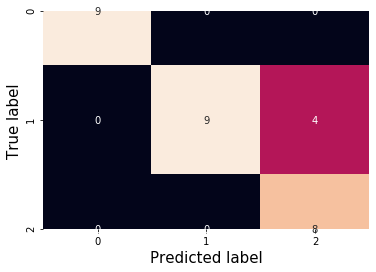

In [73]:
#Plotting the confusio matrix for visualization.
 # for plot styling
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=range(3),
            yticklabels=range(3))
plt.ylabel('True label',fontsize=15)
plt.xlabel('Predicted label',fontsize=15)